In [18]:
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pylab  as plt

#  2D卷积

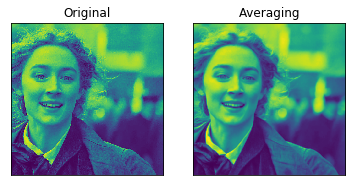

In [19]:
img = cv2.imread('C:/Users/hichens/Desktop/CV_code/images/joe.jpg',0)
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# 平均法

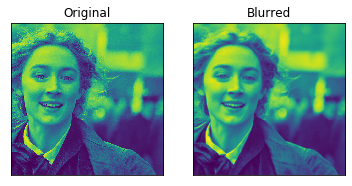

In [20]:
blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 高斯模糊

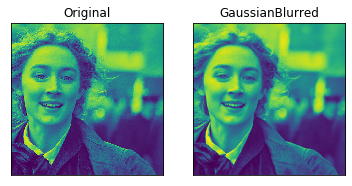

In [21]:
blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('GaussianBlurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 中值模糊

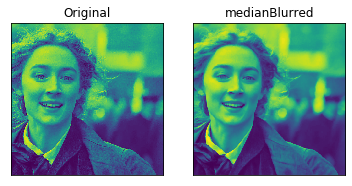

In [22]:
blur = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('medianBlurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 双边滤波

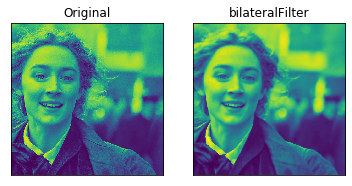

In [23]:
blur = cv2.bilateralFilter(img,9,75,75)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('bilateralFilter')
plt.xticks([]), plt.yticks([])
plt.show()

# 各向异性扩散滤波

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


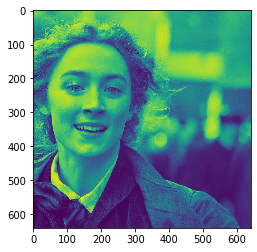

In [24]:
'''
AnisotropicDiffusion

'''
k = 15           #导热系数,控制平滑
lamda = 0.15     #控制平滑
N = 20           #迭代次数
imgn = np.zeros_like(img)
m, n = img.shape
for i in range(N):
    for p in range(1, m-1):
        for q in range(1, n-1):
            NI=img[p-1,q]-img[p,q]
            SI=img[p+1,q]-img[p,q]
            EI=img[p,q-1]-img[p,q]
            WI=img[p,q+1]-img[p,q]
            
            cN=np.exp(-NI**2/(k*k))
            cS=np.exp(-SI**2/(k*k))
            cE=np.exp(-EI**2/(k*k))
            cW=np.exp(-WI**2/(k*k))
            
            imgn[p,q]=img[p,q]+lamda*(cN*NI+cS*SI+cE*EI+cW*WI)
plt.imshow(imgn)